# IMPORT IMPORTANT LIBRARIES

In [339]:
import pandas as pd  ### to handle dataframe
import numpy as np   ### to perform numeric operation
import matplotlib.pyplot as plt  ### for visualization
import seaborn as sns ### for visualization

from sklearn.model_selection import train_test_split   ### for splitting the data
from sklearn.preprocessing import StandardScaler       ### normalize the data
from sklearn.metrics import accuracy_score             ### to get accuracy score

from sklearn.linear_model import LogisticRegression    ### logistic regression
from sklearn.neighbors import KNeighborsClassifier     ### knn
from sklearn.tree import DecisionTreeClassifier        ### Decision tree
from sklearn.ensemble import RandomForestClassifier    ### Random Forest
from sklearn.svm import SVC                            ### Support vector machine

from sklearn.model_selection import cross_val_score    ### for cross validation
from sklearn.metrics import roc_curve,auc              ### roc and auc

# READING DATA

In [192]:
! pip install openpyxl ### to read (.xlsx) file first we have to install this library

df = pd.read_excel('train.xlsx') ### reading data

In [193]:
df   

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,lobular,spiculated,low,1
1,2,4.0,43.0,round,circumscribed,NaN,1
2,3,5.0,58.0,irregular,spiculated,low,1
3,4,4.0,28.0,round,circumscribed,low,0
4,5,5.0,74.0,round,spiculated,NaN,1
...,...,...,...,...,...,...,...
806,807,5.0,62.0,irregular,ill-defined,iso,1
807,808,4.0,56.0,oval,circumscribed,low,0
808,809,5.0,58.0,irregular,ill-defined,low,1
809,810,4.0,NaN,round,ill-defined,low,0


# EDA + FEATURE ENGINEERING

In [194]:
df.info()   ### to get all information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         811 non-null    int64  
 1   BI_RADS       809 non-null    float64
 2   Age           723 non-null    float64
 3   Shape         781 non-null    object 
 4   Margin        764 non-null    object 
 5   Mass_Density  735 non-null    object 
 6   Severity      811 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 44.5+ KB


In [195]:
df.describe(include='all')     

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
count,811.000000,809.000000,723.000000,781,764,735,811.000000
unique,NaN,NaN,NaN,4,5,4,NaN
top,NaN,NaN,NaN,irregular,circumscribed,low,NaN
freq,NaN,NaN,NaN,340,298,663,NaN
mean,406.000000,4.379481,55.887967,NaN,NaN,NaN,0.459926
std,234.259827,1.914800,16.886616,NaN,NaN,NaN,0.498699
min,1.000000,0.000000,5.000000,NaN,NaN,NaN,0.000000
25%,203.500000,4.000000,45.000000,NaN,NaN,NaN,0.000000
50%,406.000000,4.000000,56.000000,NaN,NaN,NaN,0.000000
75%,608.500000,5.000000,66.000000,NaN,NaN,NaN,1.000000


### HANDELING MISSING VALUES

### QUESTION NO  - 9

**Q - What techniques have been used for treating missing values to prepare features for model building?**

**Ans** - Handeling missing values totally depend on type of data 

     1 - if the data is continous numerical data then we can use imputation method in which we replace the nan values with                
         mean,median or mode values.
         
     2 - if the data is categorical data then we replace nan values with other categorical data
         
         - if the number of missing value is less then we replace the missing values with most frequent category
         
         - if the number of missing values is more then we replace the missing values with new category
      

In [338]:
df.isna() ### checking whether null values are present or not , True = Present

,Age,Shape,Margin,Mass_Density,Severity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
806,False,False,False,False,False
807,False,False,False,False,False
808,False,False,False,False,False
809,False,False,False,False,False


In [197]:
df.drop(['Index'],axis = 1,inplace = True) ### we dont need index column so drop it

#### BI_RADS

In [198]:
### as mentioned in the porblem statement BI_RADS is no-predictive so itll not be useful 
### for prediction so iam going to drop BI_RADS

df['BI_RADS'].isna().sum()

2

In [199]:
df['BI_RADS'].isna().value_counts() ### to check the values and their counts

False    809
True       2
Name: BI_RADS, dtype: int64

In [200]:
df['BI_RADS'].unique() ### to get unique values

array([ 5.,  4.,  3., nan,  2., 55.,  0.,  6.])

#### Age

In [201]:
### Age attribute having continous numeric data so we can go for imputation method

In [202]:
df['Age'].isna().sum()

88

In [203]:
df['Age'].isna().value_counts()

False    723
True      88
Name: Age, dtype: int64

In [204]:
df['Age'].unique()

array([ 67.,  43.,  58.,  28.,  74.,  65.,  70.,  42.,  57.,  60.,  76.,
        64.,  36.,  54.,  52.,  59.,  40.,  66.,  56.,  nan,  45.,  55.,
        46.,  39.,  81.,  77.,  48.,  78.,  50.,  61.,  62.,  44.,  23.,
        80.,  63.,  53.,  49.,  51.,  25.,  72.,  73.,  68.,  33.,  47.,
        29.,  34.,  71., 130.,  24.,  75.,  41.,  87.,  21.,  19.,  35.,
        37.,  79.,  69.,  38.,  32.,  27.,  83.,  88.,  26.,   5.,  18.,
        93.,  22.,  96.])

In [205]:
df['Age'].mean()

55.88796680497925

In [206]:
df['Age'].median() ### for attribute Age we fill null values with median value of Age
                   ### because mean and mode value is close to median value

56.0

In [207]:
df['Age'].mode()[0]

59.0

In [208]:
### filling null values with median value

df['Age'].fillna(df['Age'].median(),inplace = True)

In [209]:
df['Age'].isna().sum()

0

#### Shape

In [210]:
### Attribute Shape having categorical data so we cant use imputation method so we can replace categorical data 

In [211]:
df['Shape'].isna().sum()

30

In [212]:
df['Shape'].value_counts()

irregular    340
round        192
oval         177
lobular       72
Name: Shape, dtype: int64

In [213]:
df['Shape'].isna().value_counts()

False    781
True      30
Name: Shape, dtype: int64

In [214]:
df['Shape'].unique()

array(['lobular', 'round', 'irregular', nan, 'oval'], dtype=object)

In [215]:
df['Shape'].value_counts().to_dict()

{'irregular': 340, 'round': 192, 'oval': 177, 'lobular': 72}

In [216]:
### we dont have too many nan values so i will replace the nan values with the most frequent category
### which is 'irregular'

df['Shape'].fillna('irregular',inplace = True)

In [217]:
df['Shape'].isna().sum()

0

In [218]:
df['Shape'].unique()

array(['lobular', 'round', 'irregular', 'oval'], dtype=object)

#### Margin

In [219]:
df['Margin'].isna().sum()

47

In [220]:
df['Margin'].isna().value_counts()

False    764
True      47
Name: Margin, dtype: int64

In [221]:
df['Margin'].unique()

array(['spiculated', 'circumscribed', nan, 'ill-defined', 'obscured',
       'microlobulated'], dtype=object)

In [222]:
df['Margin'].value_counts()

circumscribed     298
ill-defined       236
spiculated        116
obscured           97
microlobulated     17
Name: Margin, dtype: int64

In [223]:
### we dont have too many nan values so i will replace the nan values with the most frequent category
### which is 'circumscribed'

df['Margin'].fillna('circumscribed',inplace = True)

In [224]:
df['Margin'].isna().sum()

0

#### Mass_Density

In [225]:
df['Mass_Density'].isna().sum()

76

In [226]:
df['Mass_Density'].isna().value_counts()

False    735
True      76
Name: Mass_Density, dtype: int64

In [227]:
df['Mass_Density'].unique()

array(['low', nan, 'high', 'iso', 'fat-containing'], dtype=object)

In [228]:
df['Mass_Density'].value_counts()

low               663
iso                49
high               13
fat-containing     10
Name: Mass_Density, dtype: int64

In [229]:
### we dont have too many nan values so i will replace the nan values with the most frequent category
### which is 'low'

df['Mass_Density'].fillna('low',inplace = True)

In [230]:
df['Mass_Density'].isna().sum()

0

#### Severity

In [231]:
### this is target column and dont have any nan value so ill skip this attribute

df['Severity'].isna().sum()

0

In [232]:
df['Severity'].isna().value_counts()

False    811
Name: Severity, dtype: int64

In [233]:
df['Severity'].unique()

array([1, 0], dtype=int64)

### DATATYPE HANDELING

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       809 non-null    float64
 1   Age           811 non-null    float64
 2   Shape         811 non-null    object 
 3   Margin        811 non-null    object 
 4   Mass_Density  811 non-null    object 
 5   Severity      811 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 38.1+ KB


### 1 - Shape

In [235]:
df['Shape'].value_counts()

irregular    370
round        192
oval         177
lobular       72
Name: Shape, dtype: int64

In [236]:
df['Shape'].value_counts().to_dict()

{'irregular': 370, 'round': 192, 'oval': 177, 'lobular': 72}

In [237]:
### Using Replace method 

df['Shape'].replace({'irregular': 4, 'round': 1, 'oval': 2, 'lobular': 3},inplace = True)

In [238]:
df.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,3,spiculated,low,1
1,4.0,43.0,1,circumscribed,low,1
2,5.0,58.0,4,spiculated,low,1
3,4.0,28.0,1,circumscribed,low,0
4,5.0,74.0,1,spiculated,low,1


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       809 non-null    float64
 1   Age           811 non-null    float64
 2   Shape         811 non-null    int64  
 3   Margin        811 non-null    object 
 4   Mass_Density  811 non-null    object 
 5   Severity      811 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 38.1+ KB


### 2 - Margin

In [240]:
df['Margin'].value_counts()

circumscribed     345
ill-defined       236
spiculated        116
obscured           97
microlobulated     17
Name: Margin, dtype: int64

In [241]:
df['Margin'].value_counts().to_dict()

{'circumscribed': 345,
 'ill-defined': 236,
 'spiculated': 116,
 'obscured': 97,
 'microlobulated': 17}

In [242]:
df['Margin'].replace({'circumscribed': 1,
 'ill-defined': 4,
 'spiculated': 5,
 'obscured': 3,
 'microlobulated': 2}, inplace = True)

In [243]:
df.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,3,5,low,1
1,4.0,43.0,1,1,low,1
2,5.0,58.0,4,5,low,1
3,4.0,28.0,1,1,low,0
4,5.0,74.0,1,5,low,1


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       809 non-null    float64
 1   Age           811 non-null    float64
 2   Shape         811 non-null    int64  
 3   Margin        811 non-null    int64  
 4   Mass_Density  811 non-null    object 
 5   Severity      811 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 38.1+ KB


### 3 - Mass Density

In [245]:
df['Mass_Density'].value_counts()

low               739
iso                49
high               13
fat-containing     10
Name: Mass_Density, dtype: int64

In [246]:
df['Mass_Density'].value_counts().to_dict()

{'low': 739, 'iso': 49, 'high': 13, 'fat-containing': 10}

In [247]:
df['Mass_Density'].replace({'low': 3, 'iso': 2, 'high': 1, 'fat-containing': 4},inplace = True)

In [248]:
df.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,3,5,3,1
1,4.0,43.0,1,1,3,1
2,5.0,58.0,4,5,3,1
3,4.0,28.0,1,1,3,0
4,5.0,74.0,1,5,3,1


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       809 non-null    float64
 1   Age           811 non-null    float64
 2   Shape         811 non-null    int64  
 3   Margin        811 non-null    int64  
 4   Mass_Density  811 non-null    int64  
 5   Severity      811 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 38.1 KB


# FEATURE SELECTION

### QUESTION NO - 3

**Q - What features would you want to create for your prediction model based on data provided?**

**Ans** - BI_RADS attribute is non predictive so drop this attribute and proceed with all other attributes

In [255]:
df.drop(['BI_RADS'],axis = 1,inplace = True)

In [256]:
df.head()

,Age,Shape,Margin,Mass_Density,Severity
0,67.0,3,5,3,1
1,43.0,1,1,3,1
2,58.0,4,5,3,1
3,28.0,1,1,3,0
4,74.0,1,5,3,1


**So Age, Shape , Margin , Mass_Density will be input feature and Severity will be output feature**

# DATA VISUALISATION

### QUESTION NO - 6

**Q - Determine whether the data is normally distributed visually and statistically.**

***Ans*** - data is normally distributed as per we can see the kdeplot little bit random distributed in case of Margin and                   Shape but we can say that data is normally distributed

<AxesSubplot:xlabel='Age', ylabel='Density'>

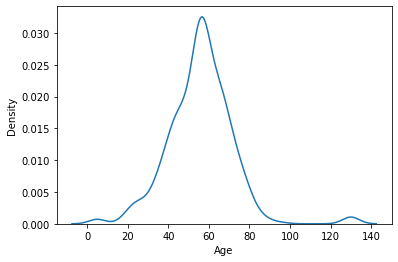

In [258]:
sns.kdeplot(df['Age']) 

<AxesSubplot:xlabel='Shape', ylabel='Density'>

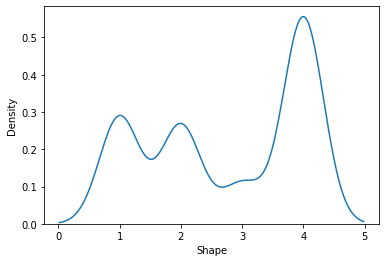

In [259]:
sns.kdeplot(df['Shape'])

<AxesSubplot:xlabel='Margin', ylabel='Density'>

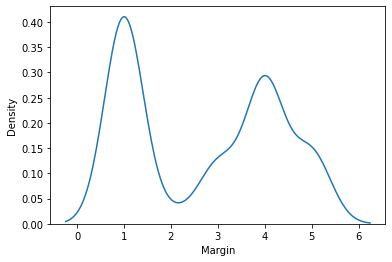

In [260]:
sns.kdeplot(df['Margin'])

<AxesSubplot:xlabel='Mass_Density', ylabel='Density'>

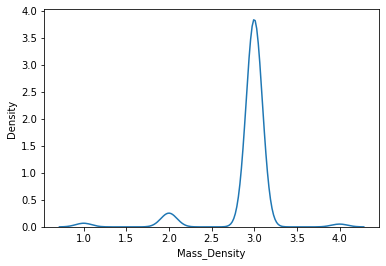

In [261]:
sns.kdeplot(df['Mass_Density'])

# DETECTING AND HANDELING OUTLIERS

### QUESTION NO - 8

***Q - How are you detecting and treating outliers in the dataset for better convergence?***

***Ans*** - to detect the outliers ill use boxplot

<AxesSubplot:xlabel='Age'>

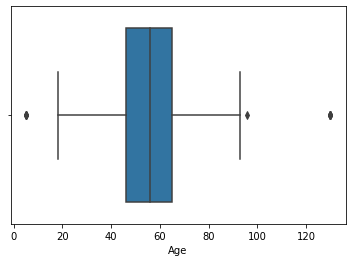

In [269]:
sns.boxplot(x=df['Age'])

### in Age attribute we can see three dots shown in fig below those three dots are outliers
### lets find out the upper tail so we can get clearance about those outliers

In [270]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75) 
iqr = q3-q1

upper_tail = q3+(1.5*iqr)
upper_tail

93.5

In [271]:
df.loc[df['Age'] > upper_tail]

,Age,Shape,Margin,Mass_Density,Severity
119,130.0,4,5,3,0
132,130.0,4,4,3,0
169,130.0,4,5,3,1
195,130.0,4,4,3,1
330,130.0,3,5,3,1
466,130.0,4,5,3,1
578,130.0,3,2,3,1
596,130.0,4,3,3,1
609,130.0,3,4,3,1
726,96.0,3,4,3,1


In [ ]:
### so basically the outliers are age value higher than upper tail 
### age is important attribute in our data frame so we cant consider it as outliers
### so we just skip

<AxesSubplot:xlabel='Shape'>

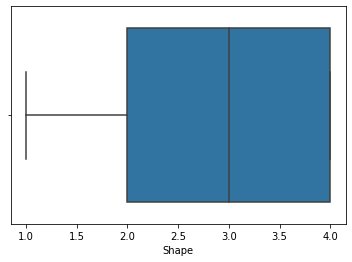

In [272]:
sns.boxplot(x=df['Shape'])

### there is no outlier in Shape attribute

<AxesSubplot:xlabel='Margin'>

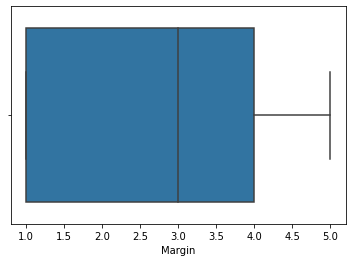

In [273]:
sns.boxplot(x=df['Margin'])

### there is no outlier in Margin attribute

<AxesSubplot:xlabel='Mass_Density'>

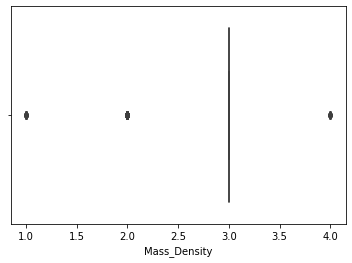

In [274]:
sns.boxplot(x=df['Mass_Density'])

### we can see the outliers but those are important as per our data so we can skip

### QUESTION NO - 10

***Q - What is the distribution of target with respect to categorical columns?***

***Ans***  - We have three categorical columns named Shape, Margin, Mass_Density and Age is not categorical column
and with the help of histogram we can see the data distribution of the columns

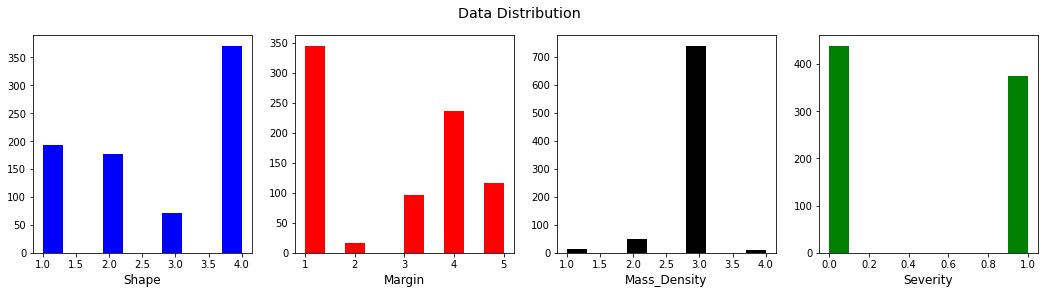

In [282]:
figure,axes = plt.subplots(1,4, sharey = False,figsize = (18,4))
x1,x2,x3,x4 = axes.flatten()
x1.hist(df['Shape'],bins = 10,color = "blue")
x2.hist(df['Margin'],bins = 10,color = "red")
x3.hist(df['Mass_Density'],bins = 10,color = "black")
x4.hist(df['Severity'],bins = 10,color = "green")

x1.set_xlabel('Shape',fontsize = 'large')
x2.set_xlabel('Margin',fontsize = 'large')
x3.set_xlabel('Mass_Density',fontsize = 'large')
x4.set_xlabel('Severity',fontsize = 'large')

plt.suptitle('Data Distribution',ha='center',fontsize = 'x-large')
plt.show()

# MODEL BUILDING AND MODELTRAINING

### QUESTION NO - 1 

***Q - Build Statistical Classification model to detect severity***

***Ans*** - i will use five different classification algorithm and compair the performance

1 - Decision Tree

2 - Random Forest

3 - KNN

4 - SVM

5 - Logistic Regression

In [292]:
### Assigning values for x and y

x = df.drop('Severity',axis = 1)
y = df['Severity']

In [286]:
### Scaling the input attributes to normalize the data within a particular range
### with the help of StandardScalar we can normalize the data

###why?
### Ans - as we seen in above kde plot we have some fetures having slight random distribution so to overcome that problem
### we using Standard Scalar to normalize the data

scalar = StandardScaler()
x = scalar.fit_transform(x)
print(x)

[[ 0.6966527   0.18819935  1.45162835  0.22191151]
 [-0.80964014 -1.41001715 -1.07877593  0.22191151]
 [ 0.13179288  0.98730761  1.45162835  0.22191151]
 ...
 [ 0.13179288  0.98730761  0.81902728  0.22191151]
 [ 0.00626848 -1.41001715  0.81902728  0.22191151]
 [ 1.19875031  0.98730761  1.45162835  0.22191151]]


In [288]:
### Splitting the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### 80% data for training
### 20% data for testing

In [319]:
df['Severity'].value_counts()

0    438
1    373
Name: Severity, dtype: int64

### QUESTION NO - 5

***Q - What is your model evaluation criteria? What are the assumptions and limitations of your approach?***

***Ans*** - so as per value counts of our target variable data distribution is nearly equal so we can say that the data is balanced so we can directly find the accuracy score. in below cell we training the model and find out the accuracy score

what if the data is imbalanced?
- if the data is imbalanced then we have to find out the confusion matrix then calculate the precision ,recall and f-beta score

In [328]:
### ill create dictionary of all the different algorithms and train the models

dictionary = {SVC(kernel = 'rbf', C = 1 ,gamma = 1000 , probability = True):"Support Vector Classifier",
             LogisticRegression(solver = 'liblinear', random_state = 0):"Logistic Regression",
             KNeighborsClassifier(n_neighbors = 10):"K-Neighbors Classifier",
             RandomForestClassifier(max_depth = 3 , n_estimators = 100 , random_state = 0):"Random Forest",
             DecisionTreeClassifier(random_state = 0):"Decision Tree Classifier"}

for model in dictionary:
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    
    print("Model Accuracy of", dictionary[model]," = ",accuracy.round(3))

Model Accuracy of Support Vector Classifier  =  0.644
Model Accuracy of Logistic Regression  =  0.791
Model Accuracy of K-Neighbors Classifier  =  0.804
Model Accuracy of Random Forest  =  0.81
Model Accuracy of Decision Tree Classifier  =  0.693


### QUESTION NO - 4

***Q - How have you performed hyper-parameter tuning and model optimization? What are the reasons for your decision choices for these steps?***

**Ans** - talking about hyperparameter i did not used hyperparameter tuning but some default hyperparameters are given below

Logistic regression --> solver = liblinear

k Neighbors --> n_neighbors = 10 --> we can give range for this

SVM --> kernel = 'rbf'

Random Forest --> max_depth = 3 and n_estimators = 100

In [322]:
### as we see above we get more accuracy by using random forest algorithm
### now i can use k-fold cross validation to check wether our model accuracy is getting better or not
### k-fold is used for improving model prediction

In [334]:
from sklearn.model_selection import cross_val_score

for model in dictionary:
    cvscore = cross_val_score(model,x,y,cv = 10)
    print("Model Accuracy of", dictionary[model],"with cross validation is = ",'{:3.2f}'.format(cvscore.mean()))

Model Accuracy of Support Vector Classifier with cross validation is =  0.70
Model Accuracy of Logistic Regression with cross validation is =  0.79
Model Accuracy of K-Neighbors Classifier with cross validation is =  0.77
Model Accuracy of Random Forest with cross validation is =  0.81
Model Accuracy of Decision Tree Classifier with cross validation is =  0.74


#### ROC AND AUC CURVE TO CHECK THE DIFFERENT MODEL PERFORMANCE

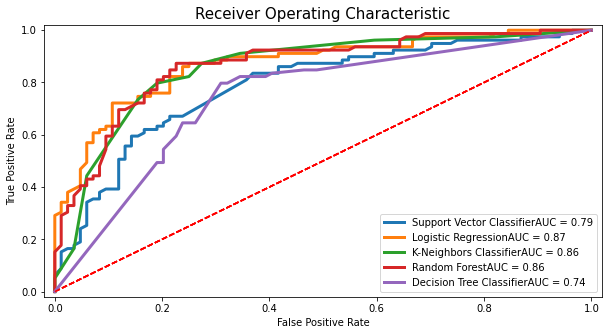

In [337]:
from sklearn.metrics import roc_curve,auc  ### import roc and auc

dictionary = {SVC(kernel = 'rbf', C = 1 ,gamma = 1000 , probability = True):"Support Vector Classifier",
             LogisticRegression(solver = 'liblinear', random_state = 0):"Logistic Regression",
             KNeighborsClassifier(n_neighbors = 10):"K-Neighbors Classifier",
             RandomForestClassifier(max_depth = 3 , n_estimators = 100 , random_state = 0):"Random Forest",
             DecisionTreeClassifier(random_state = 0):"Decision Tree Classifier"}

for model in dictionary:
    model.fit(x_train,y_train)
    
    prob = model.predict_proba(x_test)
    
    fpr,tpr,thresholds=roc_curve(y_test,prob[:,1])
    
    roc_auc = auc(fpr,tpr)
    
    plt.plot(fpr,tpr,lw = 3, label = dictionary[model]+'AUC = %0.2f'% roc_auc)
    
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.title('Receiver Operating Characteristic', fontsize = 15)
    
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

In [ ]:
### a curve pulled close to the upper left corner indicates a better performance 

### QUESTION NO - 2

**Q - What considerations have been used for model selection?**

**Ans** - for model selection my way to select the best model is to feed data to all classification or regression models and compair the accuracy as per our case Random forest is giving more accuracy even after cross validation than other classification models so ill go for Random Forest for my final model Selection

### QUESTION NO - 11

***Q - Comment on any other observations or recommendations based on your analysis***

***Ans*** - 1 - by observation we can see that we got 81% accuracy using random forest even after cross validation we can increase the accuracy by changing the default hyperparametrs that we have used during training or also we can go for hyperparameter tuning using grid and randomized search for those default hyperparameters

2 - we replaced null values with the most common data in the data frame instead of that we can go for dropping all the null vlaue we might get better accuracy

3 - we had some outliers in the dataframe columns but those outliers are important values and cant be ignored so if those values not present in the data set then our model performance might be different